# Example code

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import pandas as pd
import csv


Y_position = 4

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("/content/ETF Treynor.csv", delimiter=",")
# split into input (X) and output (Y) variables

df = pd.DataFrame(dataset)
print(df)
	# summary statistics
print(df.describe())

X = dataset[:,0:Y_position]
Y = dataset[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=2020)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")


#Model 2: decision tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X_train, y_train)
y_pred_train2 = clf.predict(scaled_X_train)
cm2_train = confusion_matrix(y_train,y_pred_train2)
print("Decision Tree")
print("================================")
print(cm2_train)
acc_train2 = (cm2_train[0,0] + cm2_train[1,1]) / sum(sum(cm2_train))
print("Decsion Tree TrainSet: Accurarcy %.2f%%" % (acc_train2*100))
print("================================")
y_pred2 = clf.predict(scaled_X_test)
cm2 = confusion_matrix(y_test,y_pred2)
acc2 = (cm2[0,0] + cm2[1,1]) / sum(sum(cm2))
print(cm2)
print("Decision Tree Testset: Accurarcy %.2f%%" % (acc2*100))
print("================================")
print("================================")
print("================================")


#Model 3 random forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, 
#min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
#n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

model3 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model3.fit(scaled_X_train, y_train)
y_predicted3 = model3.predict(scaled_X_test)

y_pred_train3 = model3.predict(scaled_X_train)
cm3_train = confusion_matrix(y_train,y_pred_train3)
print("Random Forest")
print("================================")
print(cm3_train)
acc_train3 = (cm3_train[0,0] + cm3_train[1,1]) / sum(sum(cm3_train))
print("Random Forest TrainSet: Accurarcy %.2f%%" % (acc_train3*100))
print("================================")
y_pred3 = model3.predict(scaled_X_test)
cm_test3 = confusion_matrix(y_test,y_pred3)
print(cm_test3)
acc_test3 = (cm_test3[0,0] + cm_test3[1,1]) / sum(sum(cm_test3))
print("Random Forest Testset: Accurarcy %.2f%%" % (acc_test3*100))
print("================================")
print("================================")
print("================================")

#Model 4: XGBoost

print("Xgboost")
print("================================")
#class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, 
#subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, 
#n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

model4 = GradientBoostingClassifier(random_state=0)
model4.fit(scaled_X_train, y_train)
y_pred_train4 = model4.predict(scaled_X_train)
cm4_train = confusion_matrix(y_train,y_pred_train4)
print(cm4_train)
acc_train4 = (cm4_train[0,0] + cm4_train[1,1]) / sum(sum(cm4_train))
print("Xgboost TrainSet: Accurarcy %.2f%%" % (acc_train4*100))
predictions = model4.predict(scaled_X_test)
y_pred4 = (predictions > 0.5)
y_pred4 =y_pred4*1 #convert to 0,1 instead of True False
cm4 = confusion_matrix(y_test, y_pred4)
print("==================================")
print("Xgboost on testset confusion matrix")
print(cm4)
acc4 = (cm4[0,0] + cm4[1,1]) / sum(sum(cm4))
print("Xgboost on TestSet: Accuracy %.2f%%" % (acc4*100))
print("==================================")

#Model 5: neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate
model = Sequential()
model.add(Dense(10, input_dim=Y_position, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate

model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)
# evaluate the model
scores = model.evaluate(X_train, y_train)
#print(scores)
print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions5 = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred5 = (predictions5 > 0.5)
y_pred5 = y_pred5*1 #convert to 0,1 instead of True False
cm5 = confusion_matrix(y_test, y_pred5)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm5)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc5 = (cm5[0,0] + cm5[1,1]) / sum(sum(cm5))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc5*100))



         0     1     2      3    4
0    12.92  1.18  0.81   5.41  0.0
1    12.92  1.18  0.81   5.41  0.0
2    12.92  1.18  0.81   5.44  0.0
3    12.09  1.01  0.56   3.86  0.0
4    11.34  1.12  1.07   4.06  0.0
..     ...   ...   ...    ...  ...
524  20.72  5.25  4.11  10.70  1.0
525  13.91  0.97  0.73   2.31  0.0
526  10.57  1.38  2.23   8.94  1.0
527  13.37  1.95  0.32   5.58  1.0
528  17.88  2.82  2.84  10.35  1.0

[529 rows x 5 columns]
                0           1           2           3           4
count  529.000000  529.000000  529.000000  529.000000  529.000000
mean    15.685274    2.154575    1.776919    7.905652    0.499055
std      5.393522    1.165433    1.382950    3.617214    0.500472
min      4.950000    0.500000    0.190000    0.900000    0.000000
25%     12.670000    1.380000    0.980000    5.410000    0.000000
50%     14.760000    1.800000    1.340000    7.210000    0.000000
75%     17.250000    2.570000    2.050000    9.460000    1.000000
max     43.790000    7.64000

## Model helper function


In [2]:
def train_and_predict_using_model(model_name= "",model=None):
    model.fit(scaled_X_train, y_train)
    y_predicted = model3.predict(scaled_X_test)
    y_pred_train = model.predict(scaled_X_train)
    cm_train = confusion_matrix(y_train,y_pred_train)
    print(model_name)
    print("================================")
    print("Training confusion matrix: ")
    print(cm_train)
    acc_train = (cm_train[0,0] + cm_train[1,1]) / sum(sum(cm_train))
    print("TrainSet: Accurarcy %.2f%%" % (acc_train*100))
    print("================================")
    y_pred = model.predict(scaled_X_test)
    cm_test = confusion_matrix(y_test,y_pred)
    print(cm_test)
    acc_test = (cm_test[0,0] + cm_test[1,1]) / sum(sum(cm_test))
    print("Testset: Accurarcy %.2f%%" % (acc_test*100))
    print("================================")

### Logistic regression

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

```python
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

In [3]:
# penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
# l1 - Lasso
# l2 - Ridge
# elasticnet - combination of l1 and l2

### Decision tree


- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
```

## Feature importance

### Feature importances with forests of trees

In [4]:
RF = model3
importances = RF.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature (Column index) 1 (0.490436)
2. feature (Column index) 0 (0.256819)
3. feature (Column index) 3 (0.173674)
4. feature (Column index) 2 (0.079071)


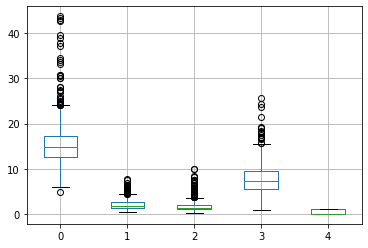

In [5]:
import seaborn as sns
import pandas as pd
boxplot = pd.DataFrame(dataset).boxplot()

## Remove outlier

In [6]:
df = pd.DataFrame(dataset)
quantile = df[4].quantile(0.99)
df1 = df[df[4] < quantile]
df.shape, df1.shape

((529, 5), (265, 5))

In [7]:
df1 = df1.dropna()

## Use top 3 features

In [10]:
indices_top3 = indices[:3]
print(indices_top3)

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("/content/ETF Treynor.csv", delimiter=",")

df = pd.DataFrame(dataset)

Y_position = 4
TOP_N_FEATURE = 3

X = dataset[:,indices_top3]
Y = dataset[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)


#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
#intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

linear_classifier = linear_model.LogisticRegression(random_state=123)
linear_classifier.fit(scaled_X_train, y_train)
y_pred_train1 = linear_classifier.predict(scaled_X_train)
cm1_train = confusion_matrix(y_train,y_pred_train1)
print("Regression")
print("================================")
print(cm1_train)
acc_train1 = (cm1_train[0,0] + cm1_train[1,1]) / sum(sum(cm1_train))
print("Regression TrainSet: Accurarcy %.2f%%" % (acc_train1*100))
print("================================")
y_pred1 = linear_classifier.predict(scaled_X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)
acc1 = (cm1[0,0] + cm1[1,1]) / sum(sum(cm1))
print("Regression Testset: Accurarcy %.2f%%" % (acc1*100))
print("================================")
print("================================")
print("================================")


#Model 2: decision tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(scaled_X_train, y_train)
y_pred_train2 = clf.predict(scaled_X_train)
cm2_train = confusion_matrix(y_train,y_pred_train2)
print("Decision Tree")
print("================================")
print(cm2_train)
acc_train2 = (cm2_train[0,0] + cm2_train[1,1]) / sum(sum(cm2_train))
print("Decsion Tree TrainSet: Accurarcy %.2f%%" % (acc_train2*100))
print("================================")
y_pred2 = clf.predict(scaled_X_test)
cm2 = confusion_matrix(y_test,y_pred2)
acc2 = (cm2[0,0] + cm2[1,1]) / sum(sum(cm2))
print(cm2)
print("Decision Tree Testset: Accurarcy %.2f%%" % (acc2*100))
print("================================")
print("================================")
print("================================")


#Model 3 random forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, 
#min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
#n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

model3 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
model3.fit(scaled_X_train, y_train)
y_predicted3 = model3.predict(scaled_X_test)

y_pred_train3 = model3.predict(scaled_X_train)
cm3_train = confusion_matrix(y_train,y_pred_train3)
print("Random Forest")
print("================================")
print(cm3_train)
acc_train3 = (cm3_train[0,0] + cm3_train[1,1]) / sum(sum(cm3_train))
print("Random Forest TrainSet: Accurarcy %.2f%%" % (acc_train3*100))
print("================================")
y_pred3 = model3.predict(scaled_X_test)
cm_test3 = confusion_matrix(y_test,y_pred3)
print(cm_test3)
acc_test3 = (cm_test3[0,0] + cm_test3[1,1]) / sum(sum(cm_test3))
print("Random Forest Testset: Accurarcy %.2f%%" % (acc_test3*100))
print("================================")
print("================================")
print("================================")

#Model 4: XGBoost

print("Xgboost")
print("================================")
#class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, 
#subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, 
#n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

model4 = GradientBoostingClassifier(random_state=0)
model4.fit(scaled_X_train, y_train)
y_pred_train4 = model4.predict(scaled_X_train)
cm4_train = confusion_matrix(y_train,y_pred_train4)
print(cm4_train)
acc_train4 = (cm4_train[0,0] + cm4_train[1,1]) / sum(sum(cm4_train))
print("Xgboost TrainSet: Accurarcy %.2f%%" % (acc_train4*100))
predictions = model4.predict(scaled_X_test)
y_pred4 = (predictions > 0.5)
y_pred4 =y_pred4*1 #convert to 0,1 instead of True False
cm4 = confusion_matrix(y_test, y_pred4)
print("==================================")
print("Xgboost on testset confusion matrix")
print(cm4)
acc4 = (cm4[0,0] + cm4[1,1]) / sum(sum(cm4))
print("Xgboost on TestSet: Accuracy %.2f%%" % (acc4*100))
print("==================================")

#Model 5: neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate

model = Sequential()
model.add(Dense(10, input_dim=TOP_N_FEATURE, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate

model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)
# evaluate the model
scores = model.evaluate(X_train, y_train)
#print(scores)
print("Neural Network Trainset: \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions5 = model.predict(X_test)
#print(predictions)
#print('predictions shape:', predictions.shape)

y_pred5 = (predictions5 > 0.5)
y_pred5 = y_pred5*1 #convert to 0,1 instead of True False
cm5 = confusion_matrix(y_test, y_pred5)
print("==================================")
print("==================================")
print("Neural Network on testset confusion matrix")
print(cm5)

## Get accurary from Confusion matrix
## Position 0,0 and 1,1 are the correct predictions 
acc5 = (cm5[0,0] + cm5[1,1]) / sum(sum(cm5))
print("Neural Network on TestSet: Accuracy %.2f%%" % (acc5*100))

[1 0 3]
Regression
[[168  34]
 [ 67 154]]
Regression TrainSet: Accurarcy 76.12%
[[55  8]
 [13 30]]
Regression Testset: Accurarcy 80.19%
Decision Tree
[[202   0]
 [  0 221]]
Decsion Tree TrainSet: Accurarcy 100.00%
[[48 15]
 [15 28]]
Decision Tree Testset: Accurarcy 71.70%
Random Forest
[[165  37]
 [ 53 168]]
Random Forest TrainSet: Accurarcy 78.72%
[[53 10]
 [11 32]]
Random Forest Testset: Accurarcy 80.19%
Xgboost
[[191  11]
 [ 16 205]]
Xgboost TrainSet: Accurarcy 93.62%
Xgboost on testset confusion matrix
[[47 16]
 [10 33]]
Xgboost on TestSet: Accuracy 75.47%
14/14 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7305
Neural Network Trainset: 
accuracy: 73.05%
Neural Network on testset confusion matrix
[[54  9]
 [14 29]]
Neural Network on TestSet: Accuracy 78.30%


# Other models and how to configure

## SVM

In [11]:
from sklearn import svm

clf = svm.SVC()
train_and_predict_using_model("SVM (Classifier)", clf)

SVM (Classifier)
Training confusion matrix: 
[[177  25]
 [ 74 147]]
TrainSet: Accurarcy 76.60%
[[58  5]
 [14 29]]
Testset: Accurarcy 82.08%


### Important hyper parameters:
- kernel
    - rbf
    - polynomial
    - sigmoid

- class weight
    - for unbalanced dataset

In [14]:
rbf_svc = svm.SVC(kernel='rbf')
train_and_predict_using_model("SVM (RBF kernel)", rbf_svc)

SVM (RBF kernel)
Training confusion matrix: 
[[177  25]
 [ 74 147]]
TrainSet: Accurarcy 76.60%
[[58  5]
 [14 29]]
Testset: Accurarcy 82.08%


In [18]:
pol_svc = svm.SVC(kernel='poly')
train_and_predict_using_model("SVM (polynomial kernel)", pol_svc)

SVM (polynomial kernel)
Training confusion matrix: 
[[197   5]
 [126  95]]
TrainSet: Accurarcy 69.03%
[[62  1]
 [24 19]]
Testset: Accurarcy 76.42%


In [19]:
sig_svc = svm.SVC(kernel='sigmoid')
train_and_predict_using_model("SVM (sigmoid kernel)", sig_svc)

SVM (sigmoid kernel)
Training confusion matrix: 
[[135  67]
 [ 78 143]]
TrainSet: Accurarcy 65.72%
[[47 16]
 [14 29]]
Testset: Accurarcy 71.70%


In [20]:
# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1:2})
train_and_predict_using_model('SVM uneven class weight', wclf)

SVM uneven class weight
Training confusion matrix: 
[[127  75]
 [ 33 188]]
TrainSet: Accurarcy 74.47%
[[41 22]
 [ 7 36]]
Testset: Accurarcy 72.64%


## Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

# maximum likelihood

gnb = GaussianNB()
train_and_predict_using_model("Naive Bayes", gnb)

Naive Bayes
Training confusion matrix: 
[[184  18]
 [ 86 135]]
TrainSet: Accurarcy 75.41%
[[60  3]
 [17 26]]
Testset: Accurarcy 81.13%


### Important hyper parameters:

- Priors
    - estimator will calculate for you. Not recommended to change. 